<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

# **Practice Lab: K Means Clustering Lab**

Estimated time needed: **45** minutes


How do brands always know which new products to recommend me? Can they read my mind? Well, sort of. By (legally) gathering information about you and your purchasing habits, corporations are able to group you with other customers that have similar characteristics. K Means clustering is one such algorithm that can categorize similar people! Then, companies can determine this population's potential preferences and personalize your experience with the brand, which ranges from product recommendations to email marketing content. 

In this notebook, you will learn the fundamentals of how to accomplish grouping with K Means and use it for segmenting mall customers and images.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/online-shopping.jpg" style="width: 60%">


## **Table of Contents**

<ol>
    <li><a href="https://#Objectives">Objectives</a></li>
    <li>
        <a href="https://#Setup">Setup</a>
        <ol>
            <li><a href="https://#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="https://#Importing-Required-Libraries">Importing Required Libraries</a></li>
        </ol>
    </li>
    <li>
        <a href="https://#Introduction">Introduction</a>
        <ol>
            <li><a href="https://#How-does-K-Means-Clustering-work?">How does K Means Clustering work?</a></li>
        </ol>
    </li>
    <li><a href="https://#Example-1:-Visual-intuition">Example 1: Visual Intuition</a></li>
    <li>
        <a href="https://#Example-2:-Segmenting-Customer-Data">Example 2: Segmenting Customer Data</a>
        <ol>
            <li><a href="https://#Problem-Statement">Problem Statement</a></li>
            <li><a href="https://#About-the-dataset">About the Dataset</a></li>
            <li><a href="https://https://#Loading-the-dataset">Loading the Dataset</a></li>
            <li><a href="https://#Getting-familiar-with-the-data">Getting familiar with the data</a></li>
            <li><a href="https://#Clusting-the-data-using-K-Means">Clustering the data using K Means</a></li>
        </ol>
    </li>
    <li>
        <a href="https://#Example-3:-Image-Segmentation">Example 3: Image Segmentation</a>
        <ol>
            <li><a href="#Loading-the-data">Loading the Data</a></li>
            <li><a href="https://#Segmenting-the-image-using-2-clusters">Segmenting the image using 2 clusters</a></li>
            <li><a href="https://#Converting-to-black-and-white">Converting to black and white</a></li>
        </ol>
    </li>    
</ol>

<a href="https://#Exercises">Exercises</a>

<ol>
    <li><a href="https://#Exercise-1---Fitting-KMeans-With-k=2">Exercise 1 - Fitting K Means with k=2</a></li>
    <li><a href="https://#Exercise-2---Viewing-Segmented-Image">Exercise 2 - Viewing Segmented Image</a></li>
    <li><a href="https://#Exercise-3---Fitting-KMeans-With-k=4-and-Viewing-Segmented-Image">Exercise 3 - Fitting K Means with k=4 and Viewing Segmented Image</a></li>
</ol>


## Objectives

After completing this lab you will be able to:

*   Explain the theory behind K Means Clustering
*   Implement K Means Clustering to perform exploratory data analysis
*   Perform Image segmentation using K Means


***


## Setup

For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


### Installing Required Libraries

The following required libraries are pre-installed in the Skills Network Labs environment. However, if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Anaconda), you will need to install these libraries by removing the `#` sign before `!mamba` in the corresponding code cell below.


In [1]:
# # All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# import piplite
# await piplite.install(['skillsnetwork'])
# await piplite.install(['numpy', 'pandas', 'scikit-learn', 'matplotlib'])

### Importing Required Libraries


In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

import skillsnetwork
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
%matplotlib inline

## Introduction


K Means Clustering is an unsupervised machine learning algorithm that organizes data into distinct groups based on certain similarities. The principle underlying the algorithm is simple to understand and is a great introduction to the potential of unsupervised learning algorithms for exploratory data analysis. In this lab, we will brush up on the basic theory underlying the algorithm and then go ahead and apply it ourselves to a real problem.


### About K Means

| Pros                                                  | Cons                                            |
| ----------------------------------------------------- | ----------------------------------------------- |
| Easy to implement                                     | Must manually chose K                           |
| Always converges to local minimum                     | Not guaranteed to find global minimum           |
| Scales well to large datasets                         | May not perform well on data of varying density |
| Generalizes to clusters of different shapes and sizes | Clusters are biased by outliers                 |


### How does K Means Clustering work?


The KMeans algorithm is quite simple and can be broken down into the following steps:

<ol>
    <li>We specify the hyperparameter <code>k</code>, which refers to the number of clusters we want our data to be clustered into.</li>
    <li>Then <code>k</code> centroids, or cluster-means, are initialized at random.</li>
    <li>Finally, the optimal centroid locations are found. This is done by the following algorithmic loop:</li>
    <ol>
        <li><b>Assignment step:</b> Assign each data point to the nearest centroid (calculated as the squared distance from the data point to centroid).</li>
        <li><b>Update step:</b> Recompute each centroid as the mean of the data points assigned to that cluster in the previous step.</li>
    </ol>
    <li>We repeat the above step until the centroid locations remain unchanged. This tells us the algorithm has converged on a local optima and gives us the final cluster assignments for that run.</li>
</ol>


## Example 1: Visual intuition

Take a look at the following animation for some physical intuition of what's going on during each iteration.

It shows several iterations of K Means Clustering (steps 3 & 4 in previous section) applied to a sample dataset with <code>k = 2</code> clusters.

![img](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/KMeansClustering_example.gif)

In each iteration, you can see the previous locations of the centroids (faded) and the their current location after they were moved to the mean of the data points assigned to that cluster. The data points are colored by the cluster they are assigned to after that iteration.

Finally, on iteration 6; we see the centroids of the clusters remain unchanged - this means the KMeans algorithm has converged and finished.


## Example 2: Segmenting Customer Data

While the theory and implementation of these algorithms are fascinating in their own right, as data scientists we're driven by the insights we can uncover and the stories we can tell with data.

Now more than ever, companies are making data driven business decisions, in part thanks to the massive increase of data available, as well as the availability of computational power to process and make sense of the data.

Customer segmentation is a process where customers are grouped together based on some common characteristics. For example, customers can be divided based on age, gender, income, marital status, and others. Segmenting customers in this way can have several applications for a business. For instance, common characteristics of the most profitable customers can be identified and a tailored marketing strategy can be implemented to target them.

Let's have a go at customer segmentation using the K Means Clustering algorithm.


### Problem Statement

Suppose you are a data scientist at MegaMind Sporting Goods Ltd.

You've been tasked with segmenting customers into groups depending on their purchasing habits.

Once you have this information, your colleague John will be able to generate clothing recommendations tailored for each customer group.


### About the dataset

We will explore a simple example of customer segmentation using the [Mall Customers](https://github.com/SteffiPeTaffy/machineLearningAZ/blob/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2024%20-%20K-Means%20Clustering/Mall_Customers.csv) dataset. This is an artificial dataset that contains data on customers of a shopping mall. In particular, the following features are given about each customer.

*   **CustomerID** - A unique identifying number for each the customer
*   **Gender**
*   **Age**
*   **Annual Income** - The annual income of the customer given in thousands of dollars
*   **Spending Score** - A value given to the customer based on their spending habits, such as total spending and frequency. A higher value indicates a higher value customer for the mall


### Loading the dataset


In [3]:
# Download the dataset and read it into a Pandas dataframe
await skillsnetwork.download('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/data/CustomerData.csv')
df = pd.read_csv('CustomerData.csv', index_col=0)

Saved as 'CustomerData.csv'


Let's take a peek at our dataset to ensure it was loaded properly.


In [4]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


### Getting familiar with the data

First, let's take a look at the data we have to gain a better general understanding of it before we attempt any clustering.

Let's start by looking at the distributions of some of the features.


We can start by analyzing the ratio of male to female customers that were surveyed.


In [6]:
df[df['Gender']=='Male'].shape[1]

4

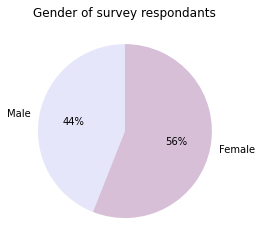

In [7]:
num_male = df[df['Gender'] == 'Male'].shape[0]
num_female = df[df['Gender'] == 'Female'].shape[0]
plt.pie(
    [num_male, num_female],
    labels=['Male', 'Female'],
    startangle=90,
    autopct='%1.f%%',
    colors=['lavender', 'thistle'])
plt.title('Gender of survey respondants')
plt.show()

We see that we have slightly more female respondents in our survey. Next let's plot histograms of the age and annual incomes of the customers.


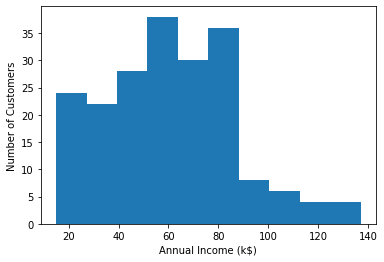

In [8]:
plt.hist(df['Annual Income (k$)'], bins=10)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Number of Customers')
plt.show()

Our distribution appears slightly skewed to the right. Not as many people are making over $100k per year.

Let's take a look at people's annual income vs spending score:


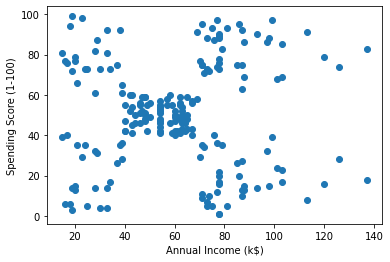

In [4]:
xlabel = 'Annual Income (k$)'
ylabel = 'Spending Score (1-100)'
X = df[[xlabel, ylabel]]
plt.scatter(X[xlabel], X[ylabel])
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

This looks promising, we can see our customers seem to fall into \~5 categories:

1.  **Low** income, **high** spending.
2.  **High** income, **low** spending.
3.  **Low** income, **low** spending.
4.  **High** income, **low** spending.
5.  **Medium** income, **medium** spending.

If we manage to segment our existing customers into these 5 categories, we will obtain exactly the information John requires:


### Clusting the data using K Means

Let's start clusting our data!

To do so, we simply load the <code>sklearn.cluster.KMeans</code> object - with our desired number of clusters <code>k = 5</code>:


In [5]:
km = KMeans(n_clusters=5, random_state=42)
km.fit(X)

KMeans(n_clusters=5, random_state=42)

In [6]:
km.labels_

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [12]:
for i in np.unique(km.labels_):
    print(X[i==km.labels_])

            Annual Income (k$)  Spending Score (1-100)
CustomerID                                            
44                          39                      61
47                          40                      55
48                          40                      47
49                          40                      42
50                          40                      42
...                        ...                     ...
122                         67                      40
123                         69                      58
127                         71                      35
133                         72                      34
143                         76                      40

[81 rows x 2 columns]
            Annual Income (k$)  Spending Score (1-100)
CustomerID                                            
125                         70                      29
129                         71                      11
131                         71            

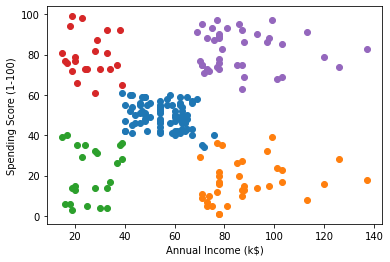

In [13]:
for label in np.unique(km.labels_):
    X_ = X[label == km.labels_]
    plt.scatter(X_['Annual Income (k$)'], X_['Spending Score (1-100)'], label=label)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

Awesome! Our KMeans algorithm was able to correctly group our data into the 5 categories we initially noticed


## Example 3: Image Segmentation

Image segmentation is the process of locating objects and boundaries in an image.

Various clustering can be used for this task.

**How** is this done?:

1.  We cluster pixels using their brightness (grayscale) or rgb values (color).
2.  We replace each pixel with the average brightness or rgb value of pixels in their cluster.

Let's look at an example using KMeans:


### Loading the data

Let's start by loading the data into a <code>numpy.array</code> and taking a look at the image:


Saved as 'cameraman.png'
The image is 490px by 487px


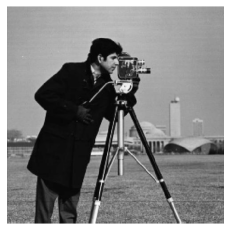

In [14]:
await skillsnetwork.download('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/cameraman.png')
img = plt.imread('cameraman.png')
print(f'The image is {img.shape[0]}px by {img.shape[1]}px')
plt.axis('off')
plt.imshow(img)
plt.show()

### Segmenting the image using 2 clusters

In this example we will segment our image into <code>k = 2</code> color-clusters:


In [15]:
k = 2

X = img.reshape(-1, 1)
km = KMeans(n_clusters=k, random_state=42)

In [16]:
km.fit(X)

KMeans(n_clusters=2, random_state=42)

In [17]:
X.shape

(954520, 1)

In [18]:
km.cluster_centers_

array([[0.75301254],
       [0.16797069]], dtype=float32)

Let's see our segmented image; once we replace each pixel with the mean of the cluster it belongs to:


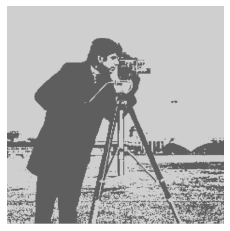

In [19]:
seg = np.zeros(X.shape)
for i in range(k): #range of number of cluster, 2 in our case
    seg[km.labels_ == i] = km.cluster_centers_[i]
seg = seg.reshape(img.shape)
plt.axis('off')
plt.imshow(seg)

Awesome! Even as a human we can still easily recognize our image after segmentation with <code>k = 2</code> colors.

### Converting to black and white

Alternatively we may view the image in black and white:


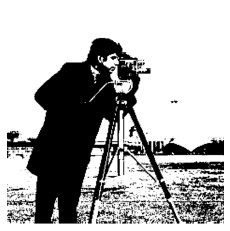

In [20]:
seg = np.zeros(X.shape)
for i in range(k):
    seg[km.labels_ == i] = 255 if km.cluster_centers_[i] > 0.5 else 0
seg = seg.reshape(img.shape).astype(np.uint8)
plt.axis('off')
plt.imshow(seg)
plt.show()

# Exercises

In this section, we will segment another image; this time in full-color with various values for k.

Please run the following cell to load the data for the exercises:


Saved as 'kingfisher.jpeg'


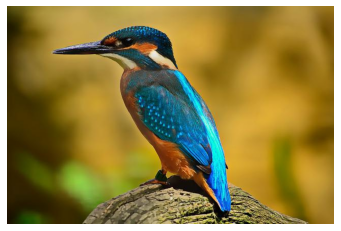

In [21]:
await skillsnetwork.download('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/kingfisher.jpeg')
img = plt.imread('kingfisher.jpeg', format='jpeg')
plt.axis('off')
plt.imshow(img)
plt.show()

### Exercise 1 - Fitting KMeans With k=2


In [22]:
# TODO
k=2
X = img.reshape(-1,3) #to retain colorful picture need to use rgb format
km = KMeans(n_clusters=k, random_state=42)
km.fit(X)

KMeans(n_clusters=2, random_state=42)

<details>
    <summary>Click here for Solution</summary>

```python
k = 2

X = img.reshape(-1, 3) # Remember, since image is RGB
km = KMeans(n_clusters=k, random_state=42)
km.fit(X)
```

</details>


### Exercise 2 - Viewing Segmented Image


In [24]:
# TODO
seg = np.zeros(X.shape)
for i in range(k):
    seg[km.labels_==i] = km.cluster_centers_[i]
seg=seg.reshape(img.shape).astype(np.uint8)

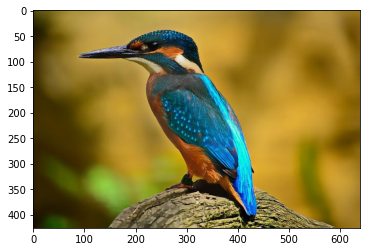

In [25]:
plt.imshow(img)

<details>
    <summary>Click here for Solution</summary>

```python
seg = np.zeros(X.shape)
for i in range(k):
    seg[km.labels_ == i] = km.cluster_centers_[i]
seg = seg.reshape(img.shape).astype(np.uint8)
plt.imshow(seg)
```

</details>


### Exercise 3 - Fitting KMeans With k=4 and Viewing Segmented Image


In [26]:
# TODO
k = 4
X=img.reshape(-1,3)
km = KMeans(n_clusters=k,random_state=42)
km.fit(X)

KMeans(n_clusters=4, random_state=42)

In [ ]:
seg = np.zeros(X.shape)
for i in range(k):
    seg[km.labels_ == i] = km.cluster_centers_[i]
seg = seg.reshape(img.shape).astype(np.uint8)

<details>
    <summary>Click here for Solution</summary>

```python
k = 4

X = img.reshape(-1, 3) # Remember, since image is rgb
km = KMeans(n_clusters=k, random_state=42)
km.fit(X)

seg = np.zeros(X.shape)
for i in range(k):
    seg[km.labels_ == i] = km.cluster_centers_[i]
seg = seg.reshape(img.shape).astype(np.uint8)
plt.imshow(seg)
```

</details>


Congratulations! You've completed the exercises. Later, you will learn about another clustering algorithm, GMM which performs even better on image segmentation.


### Thank you for completing this lab!

## Author

[David Pasternak](https://www.linkedin.com/in/david-pasternak-6b84a2208/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01)

[Sam Prokopchuk](https://www.linkedin.com/in/sam-prokopchuk-1908b21a0/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01)

### Other Contributors

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By      | Change Description    |
| ----------------- | ------- | --------------- | --------------------- |
| 2022-03-28        | 0.1     | David Pasternak | Created Lab           |
| 2022-05-10        | 0.2     | Sam Prokopchuk  | Complete Draft of Lab |
|2022-07-18.        |0.2      |Svitlana K      | Review and edit|

## <h3 align="center"> © IBM Corporation 2022. All rights reserved. <h3/>
